

<center><H1>Exploratory Data Analysis (EDA) on the MTA turnstiles Data</H1></center>

       Randa Almohammadi               Modhi Alhbrdi
      randa1414@gmail.com        modhi.alhbrdi@outlook.com

***

## Table of content:
  * [Reading Data](#first)
  * [Data Exploration](#second)
  * [Data Cleaning](#third)
  * [Data Analysis](#forth)
  * [Visulizations](#fifth)
  * [SQL](#sixth)


***

# Reading Data: <a class="anchor" id="first"></a>

In [1]:
import pandas as pd

In [2]:
def get_data(week_nums):
    url='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    dfs=[]
    for week_num in week_nums:
        flink=url.format(week_num)
        dfs.append(pd.read_csv(flink))
    return pd.concat(dfs)
week_nums=[181103,181110,181117,181124,181201,181208,181215,181222,181229,190105,190112,190119,190126]
tdf=get_data(week_nums)


# Data Exploration:<a class="anchor" id="second"></a>

In [3]:
tdf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,00:00:00,REGULAR,6811988,2309879
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,04:00:00,REGULAR,6812018,2309884
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,08:00:00,REGULAR,6812047,2309925
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,12:00:00,REGULAR,6812143,2309997
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,16:00:00,REGULAR,6812374,2310050


In [4]:
tdf.isna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
201594,False,False,False,False,False,False,False,False,False,False,False
201595,False,False,False,False,False,False,False,False,False,False,False
201596,False,False,False,False,False,False,False,False,False,False,False
201597,False,False,False,False,False,False,False,False,False,False,False


In [5]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611110 entries, 0 to 201598
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [6]:
tdf.describe()

,ENTRIES,EXITS
count,2.611110e+06,2.611110e+06
mean,3.950262e+07,3.301823e+07
std,2.045004e+08,1.917087e+08
min,0.000000e+00,0.000000e+00
25%,4.658140e+05,2.095950e+05
50%,2.407716e+06,1.379278e+06
75%,6.922512e+06,4.812294e+06
max,2.129661e+09,2.062520e+09


In [7]:
tdf.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

# Data Cleaning: <a class="anchor" id="third"></a>

In [8]:
tdf.drop_duplicates(inplace = True)

In [9]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611110 entries, 0 to 201598
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [10]:
import datetime

In [11]:
tdf["DATETIME"]=pd.to_datetime(tdf.DATE + " " + tdf.TIME,format= "%m/%d/%Y %H:%M:%S")

In [12]:
tdf

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,00:00:00,REGULAR,6811988,2309879,2018-10-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,04:00:00,REGULAR,6812018,2309884,2018-10-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,08:00:00,REGULAR,6812047,2309925,2018-10-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,12:00:00,REGULAR,6812143,2309997,2018-10-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,16:00:00,REGULAR,6812374,2310050,2018-10-27 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
201594,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/25/2019,04:00:00,REGULAR,5554,368,2019-01-25 04:00:00
201595,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/25/2019,08:00:00,REGULAR,5554,368,2019-01-25 08:00:00
201596,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/25/2019,12:00:00,REGULAR,5554,368,2019-01-25 12:00:00
201597,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/25/2019,16:00:00,REGULAR,5554,368,2019-01-25 16:00:00


In [13]:
tdf.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME","TIME"], inplace=True)

In [14]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611072 entries, 0 to 201598
Data columns (total 12 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   C/A                                                                   object        
 1   UNIT                                                                  object        
 2   SCP                                                                   object        
 3   STATION                                                               object        
 4   LINENAME                                                              object        
 5   DIVISION                                                              object        
 6   DATE                                                                  object        
 7   TIME                                                                  obj

In [15]:
# tdfsubset=tdf[["STATION","DATE_TIME","ENTRIES","EXITS","DESC"]]

tdf.columns = [column.strip() for column in tdf.columns]
tdf.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME'],
      dtype='object')

In [16]:
tdfsubset=tdf[["C/A","UNIT","SCP","STATION","DATETIME","ENTRIES","EXITS","DESC","TIME"]]

In [17]:
tdfsubset

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,DESC,TIME
0,A002,R051,02-00-00,59 ST,2018-10-27 00:00:00,6811988,2309879,REGULAR,00:00:00
1,A002,R051,02-00-00,59 ST,2018-10-27 04:00:00,6812018,2309884,REGULAR,04:00:00
2,A002,R051,02-00-00,59 ST,2018-10-27 08:00:00,6812047,2309925,REGULAR,08:00:00
3,A002,R051,02-00-00,59 ST,2018-10-27 12:00:00,6812143,2309997,REGULAR,12:00:00
4,A002,R051,02-00-00,59 ST,2018-10-27 16:00:00,6812374,2310050,REGULAR,16:00:00
...,...,...,...,...,...,...,...,...,...
201594,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 04:00:00,5554,368,REGULAR,04:00:00
201595,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 08:00:00,5554,368,REGULAR,08:00:00
201596,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 12:00:00,5554,368,REGULAR,12:00:00
201597,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 16:00:00,5554,368,REGULAR,16:00:00


In [18]:
tdfsubset.DESC.value_counts()

REGULAR       2599769
RECOVR AUD      11303
Name: DESC, dtype: int64

In [19]:
tdfsubset.STATION.value_counts()

34 ST-PENN STA     54506
FULTON ST          52656
23 ST              38194
GRD CNTRL-42 ST    36578
CANAL ST           32022
                   ...  
NEW LOTS            1563
190 ST              1527
CLEVELAND ST        1100
SUTTER AV           1094
39 AV                  6
Name: STATION, Length: 378, dtype: int64

# Data Analysis: <a class="anchor" id="forth"></a>

In [20]:
def edit(df):
    ## This code is to add a column for the day of the week
    df['Day'] = df[['DATETIME']]\
    .apply(lambda x: datetime.datetime.strftime(x['DATETIME'], '%A'), axis=1)
    
    ## This code is to remove non Regular values from DESC
    
    df = df.drop(df.loc[df.DESC != 'REGULAR'].index)
    df = df.drop(['DESC'], axis=1, errors='ignore') 
    
    return df

In [21]:
tdfsubset=edit(tdfsubset)

<ipython-input-20-16988e7cdceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df[['DATETIME']]\


In [22]:
tdfsubset

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day
8,A002,R051,02-00-00,59 ST,2018-10-28 08:00:00,6812850,2310150,08:00:00,Sunday
9,A002,R051,02-00-00,59 ST,2018-10-28 12:00:00,6812972,2310214,12:00:00,Sunday
10,A002,R051,02-00-00,59 ST,2018-10-28 16:00:00,6813196,2310260,16:00:00,Sunday
11,A002,R051,02-00-00,59 ST,2018-10-28 20:00:00,6813455,2310311,20:00:00,Sunday
26,A002,R051,02-00-00,59 ST,2018-10-31 08:00:00,6816623,2311476,08:00:00,Wednesday
...,...,...,...,...,...,...,...,...,...
201594,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 04:00:00,5554,368,04:00:00,Friday
201595,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 08:00:00,5554,368,08:00:00,Friday
201596,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 12:00:00,5554,368,12:00:00,Friday
201597,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-01-25 16:00:00,5554,368,16:00:00,Friday


In [23]:
## in order to drop nulls in dataframe created by the previus groupby
print("prior shape: ",tdfsubset.shape)
tdfsubset.dropna(how='any', inplace=True)
print("post shape: ", tdfsubset.shape)

prior shape:  (2472026, 9)
post shape:  (2472026, 9)


In [24]:
(tdfsubset
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

# DROP DUPLICATES
print("prior shape: ", tdfsubset.shape)
tdfsubset.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)
print("post shape: ", tdfsubset.shape)

prior shape:  (2472026, 9)
post shape:  (2472026, 9)


In [25]:
tdfsubset = tdfsubset.sort_values(['STATION', 'C/A', 'UNIT', 'SCP','DATETIME'])
tdfsubset.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day
30428,H007,R248,00-00-00,1 AV,2018-10-27 00:00:00,14072314,15793233,00:00:00,Saturday
30429,H007,R248,00-00-00,1 AV,2018-10-27 04:00:00,14072314,15793234,04:00:00,Saturday
30430,H007,R248,00-00-00,1 AV,2018-10-27 08:00:00,14072314,15793235,08:00:00,Saturday
30431,H007,R248,00-00-00,1 AV,2018-10-27 12:00:00,14072314,15793236,12:00:00,Saturday
30432,H007,R248,00-00-00,1 AV,2018-10-27 16:00:00,14072314,15793236,16:00:00,Saturday


In [26]:
## This code is to add a new colmins names entry_diff and exit_diff 
##that calculate the entries /exits for a given time
import pandas as pd
tdfsubset['entryCounter'] = tdfsubset.groupby(['STATION', 'C/A', 'UNIT', 'SCP'], as_index=False)['ENTRIES'].diff()
tdfsubset['exitCounter'] = tdfsubset.groupby(['STATION', 'C/A', 'UNIT', 'SCP'], as_index=False)['EXITS'].diff()

In [27]:
tdfsubset.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day,entryCounter,exitCounter
30428,H007,R248,00-00-00,1 AV,2018-10-27 00:00:00,14072314,15793233,00:00:00,Saturday,NaN,NaN
30429,H007,R248,00-00-00,1 AV,2018-10-27 04:00:00,14072314,15793234,04:00:00,Saturday,0.0,1.0
30430,H007,R248,00-00-00,1 AV,2018-10-27 08:00:00,14072314,15793235,08:00:00,Saturday,0.0,1.0
30431,H007,R248,00-00-00,1 AV,2018-10-27 12:00:00,14072314,15793236,12:00:00,Saturday,0.0,1.0
30432,H007,R248,00-00-00,1 AV,2018-10-27 16:00:00,14072314,15793236,16:00:00,Saturday,0.0,0.0


In [28]:
## in order to drop nulls in dataframe created by the previus groupby
print("prior shape: ",tdfsubset.shape)
tdfsubset.dropna(how='any', inplace=True)
print("post shape: ", tdfsubset.shape)

prior shape:  (2472026, 11)
post shape:  (2467179, 11)


In [29]:
## outlier considered if the number of entries greater than seconds in 4 hours

threshold_entry = 14400
threshold_exit = 14400

print("prior shape: ", tdfsubset.shape)
tdfsubset = tdfsubset[(tdfsubset['entryCounter'] < threshold_entry) & (tdfsubset['exitCounter'] < threshold_exit)]
print("post shape: ", tdfsubset.shape)

prior shape:  (2467179, 11)
post shape:  (2467073, 11)


In [30]:
tdfsubset.head(20)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day,entryCounter,exitCounter
30429,H007,R248,00-00-00,1 AV,2018-10-27 04:00:00,14072314,15793234,04:00:00,Saturday,0.0,1.0
30430,H007,R248,00-00-00,1 AV,2018-10-27 08:00:00,14072314,15793235,08:00:00,Saturday,0.0,1.0
30431,H007,R248,00-00-00,1 AV,2018-10-27 12:00:00,14072314,15793236,12:00:00,Saturday,0.0,1.0
30432,H007,R248,00-00-00,1 AV,2018-10-27 16:00:00,14072314,15793236,16:00:00,Saturday,0.0,0.0
30433,H007,R248,00-00-00,1 AV,2018-10-27 20:00:00,14072314,15793236,20:00:00,Saturday,0.0,0.0
30434,H007,R248,00-00-00,1 AV,2018-10-28 00:00:00,14072314,15793237,00:00:00,Sunday,0.0,1.0
30435,H007,R248,00-00-00,1 AV,2018-10-28 04:00:00,14072314,15793238,04:00:00,Sunday,0.0,1.0
30436,H007,R248,00-00-00,1 AV,2018-10-28 08:00:00,14072314,15793238,08:00:00,Sunday,0.0,0.0
30437,H007,R248,00-00-00,1 AV,2018-10-28 12:00:00,14072314,15793238,12:00:00,Sunday,0.0,0.0
30438,H007,R248,00-00-00,1 AV,2018-10-28 16:00:00,14072314,15793242,16:00:00,Sunday,0.0,4.0


# Visulizations: <a class="anchor" id="fifth"></a>

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
def top_5_stations(df):
    """ Return dataframe with top 5 stations ranked by average daily entryCounter
    """
    df1 = df.groupby(['STATION', pd.Grouper(key='DATETIME', freq='1D')])\
    .sum()\
    .reset_index()\
    .groupby(['STATION'])\
    .mean()\
    .entryCounter\
    .sort_values(ascending=False)
    stations = df1.reset_index().STATION.unique()[:5]
    df2 = df[df.STATION.apply(lambda x: x in stations)][['STATION', 'DATETIME', 'entryCounter', 'Day','TIME']]
    return df2


def five_station_hist(df):
    """ Returns top FIVE stations by average daily volume as a bar chart
    """
    
    df_pre = df[['STATION', 'DATETIME', 'entryCounter']]
    df1 = df_pre.groupby(['STATION', pd.Grouper(key='DATETIME', freq='1D')])\
        .sum()\
        .reset_index()\
        .groupby(['STATION'])\
        .mean()\
        .entryCounter\
        .sort_values(ascending=False)[:5]
    print(df1.shape)
    
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_axes([0,0,1,1])
    df1.plot(kind='bar', ax=ax1)
    ax1.set_xlabel('Station')
    ax1.set_ylabel('Daily Average Volume')
    ax1.set_title('Daily Weekday Average Volume of the 5 Busiest Stations')
    return df1



def total_enteries_weekday_box(df, title):
    """ Return boxplots showing distribution of average daily enteries
        by day of the week
    """
    df_pre = df[['DATETIME', 'Day', 'entryCounter', 'STATION']]
    df1 = df_pre.groupby([pd.Grouper(key='DATETIME', freq='1D'), 'Day', 'STATION'])\
    .sum()\
    .reset_index()

    fig, ax1 = plt.subplots(figsize=(15,8))
    ax = sns.boxplot(x='Day', y='entryCounter', data=df1, showfliers=False, ax=ax1)
    ax.set_ylabel('Daily Traffic Across T5 Stations')
    ax.set_xlabel('Day of the Week')
    ax.set_title(title)
    fig.show()

In [33]:
top_five = top_5_stations(tdfsubset)
top_five.shape

(145035, 5)

(5,)


STATION
TIMES SQ-42 ST     81652.802198
14 ST-UNION SQ     78293.307692
42 ST-PORT AUTH    69098.329670
FULTON ST          67194.087912
59 ST COLUMBUS     62724.362637
Name: entryCounter, dtype: float64

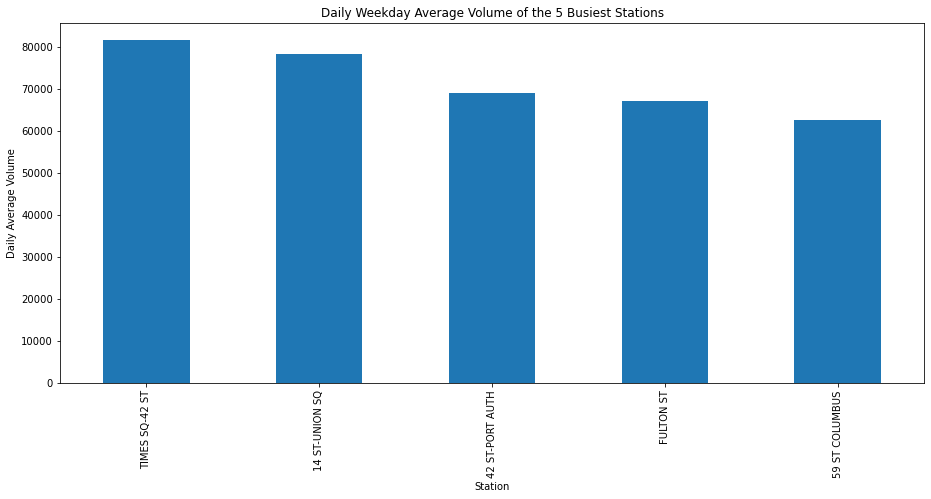

In [34]:
five_station_hist(top_five)

<ipython-input-32-7d81f26c5972>:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


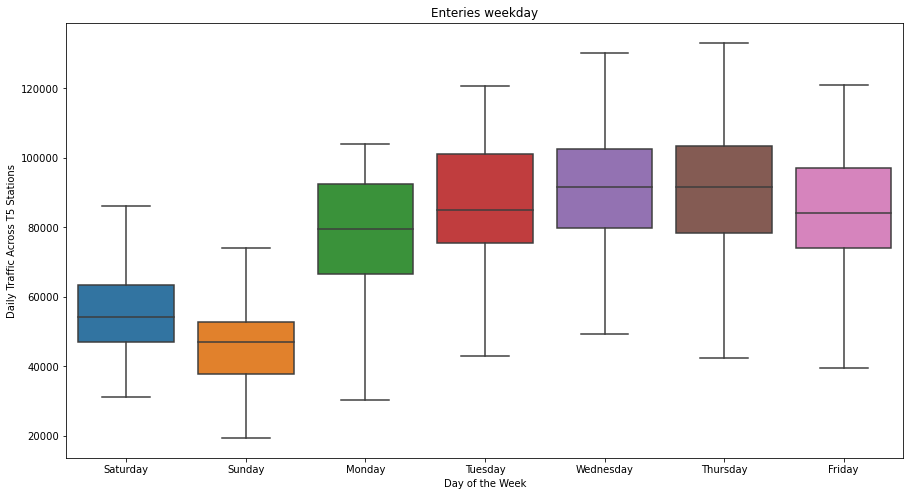

In [35]:
enterCounter=total_enteries_weekday_box(top_five ,"Enteries weekday")
enterCounter

In [36]:
tdfsubset.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day,entryCounter,exitCounter
30429,H007,R248,00-00-00,1 AV,2018-10-27 04:00:00,14072314,15793234,04:00:00,Saturday,0.0,1.0
30430,H007,R248,00-00-00,1 AV,2018-10-27 08:00:00,14072314,15793235,08:00:00,Saturday,0.0,1.0
30431,H007,R248,00-00-00,1 AV,2018-10-27 12:00:00,14072314,15793236,12:00:00,Saturday,0.0,1.0
30432,H007,R248,00-00-00,1 AV,2018-10-27 16:00:00,14072314,15793236,16:00:00,Saturday,0.0,0.0
30433,H007,R248,00-00-00,1 AV,2018-10-27 20:00:00,14072314,15793236,20:00:00,Saturday,0.0,0.0


In [37]:

def recommendation_chart(df):
    """ Returns bar chart of top 5 (STATION, TIME, Day) combos
    """
    df_pre = df[['STATION', 'DATETIME', 'entryCounter', 'Day', 'TIME']].copy()
    
    df1 = df_pre.groupby(['STATION','DATETIME','TIME','Day'])\
    .sum()\
    .reset_index()\
    .groupby(['STATION', 'TIME', 'Day'])\
    .mean()\
    .sort_values(by='entryCounter', ascending=False)
    
    fig, ax = plt.subplots(figsize=(12,8))
    df1[:5]['entryCounter'].sort_values(ascending=True).plot(kind='barh', ax=ax)
    ax.set_xlabel('Average Volume')
    ax.set_ylabel('Time and Place')
    ax.set_title('Busiest Subways')

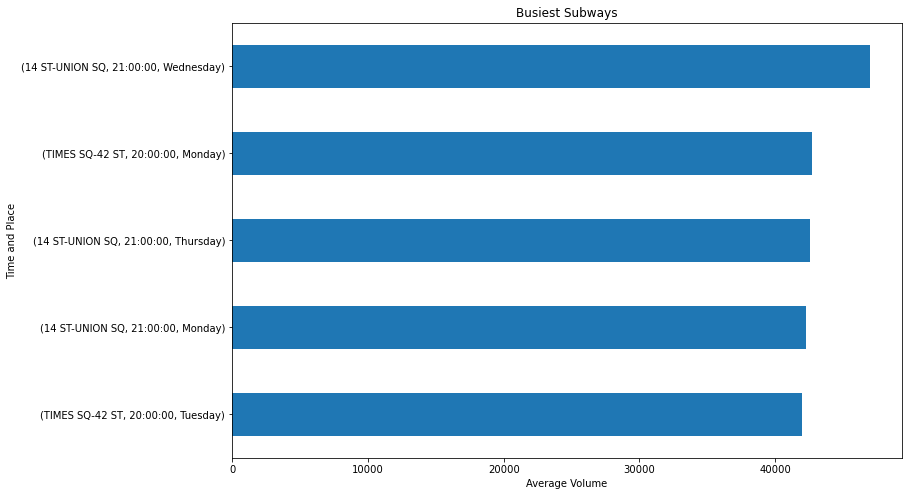

In [38]:
recommendation_chart(top_five)

In [39]:
def recommendation_chart_max(df):
    """ Returns bar chart of top 5 (STATION, TIME, Day) combos
    """
    df_pre = df[['STATION', 'DATETIME', 'entryCounter', 'Day', 'TIME']].copy()
    
    df1 = df_pre.groupby(['STATION','DATETIME','TIME','Day'])\
    .sum()\
    .reset_index()\
    .groupby(['STATION', 'TIME', 'Day'])\
    .max()\
    .sort_values(by='entryCounter', ascending=False)
    
    fig, ax = plt.subplots(figsize=(12,8))
    df1[:10]['entryCounter'].sort_values(ascending=True).plot(kind='barh', ax=ax)
    ax.set_xlabel('max Volume')
    ax.set_ylabel('Time and Place')
    ax.set_title('Busiest Subways')

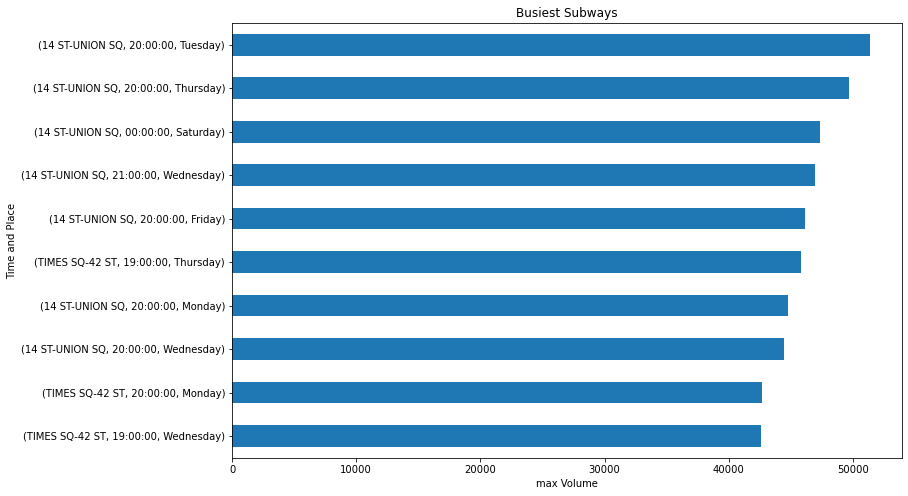

In [40]:
 recommendation_chart_max(top_five)

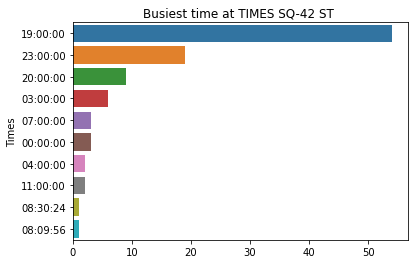

In [41]:
temp1=None
temp1 = tdfsubset[tdfsubset.STATION == 'TIMES SQ-42 ST'].sort_values('entryCounter', ascending=False)[:100].copy()
temp1['times'] = temp1.DATETIME.dt.time
plot_s = temp1.times.value_counts()
plot_s.index.name = 'Times'
plot1 = sns.barplot(y=plot_s.index, x=plot_s.values).set(title='Busiest time at TIMES SQ-42 ST ')

In [42]:
tdfsubset.to_csv("tdfsubset.csv")

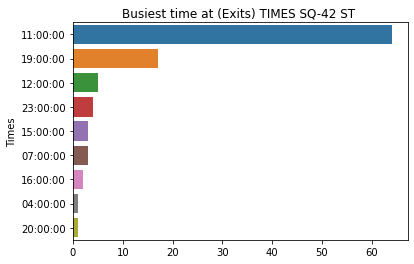

In [43]:
### exites###

temp1=None
temp1 = tdfsubset[tdfsubset.STATION == 'TIMES SQ-42 ST'].sort_values('exitCounter', ascending=False)[:100].copy()
temp1['times'] = temp1.DATETIME.dt.time
plot_s = temp1.times.value_counts()
plot_s.index.name = 'Times'
plot1 = sns.barplot(y=plot_s.index, x=plot_s.values).set(title='Busiest time at (Exits) TIMES SQ-42 ST ')

In [44]:
def top_5_stations_Exits(df):
    """ Return dataframe with top 5 stations ranked by average daily exitCounter
    """
    df1 = df.groupby(['STATION', pd.Grouper(key='DATETIME', freq='1D')])\
    .sum()\
    .reset_index()\
    .groupby(['STATION'])\
    .mean()\
    .exitCounter\
    .sort_values(ascending=False)
    stations = df1.reset_index().STATION.unique()[:5]
    df2 = df[df.STATION.apply(lambda x: x in stations)][['STATION', 'DATETIME', 'exitCounter', 'Day','TIME']]
    return df2
exitsT5=top_5_stations_Exits(tdfsubset)


STATION
TIMES SQ-42 ST     79019.538462
14 ST-UNION SQ     75381.813187
42 ST-PORT AUTH    60230.967033
FULTON ST          54984.703297
47-50 STS ROCK     54680.395604
Name: exitCounter, dtype: float64

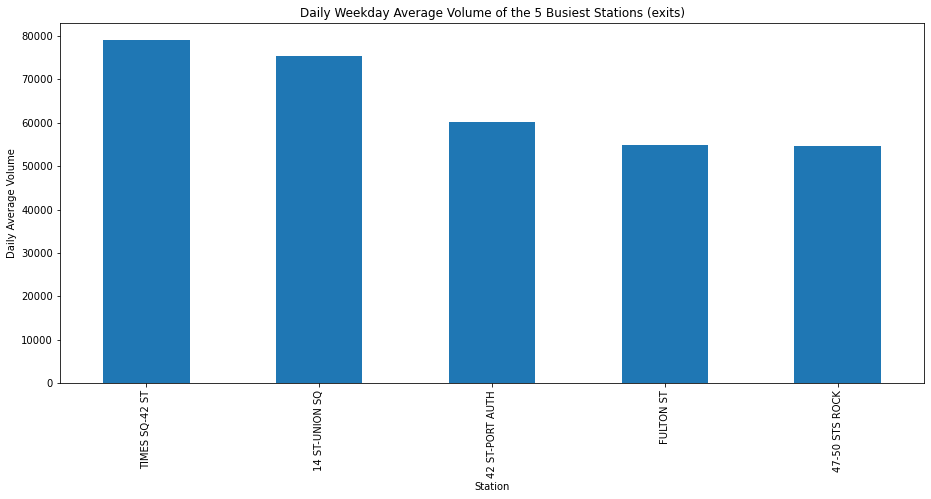

In [45]:
def five_station_ExitHist(df):
    """ Returns top FIVE stations(EXIT) by average daily volume as a bar chart
    """
    
    df_pre = df[['STATION', 'DATETIME', 'exitCounter']]
    df1 = df_pre.groupby(['STATION', pd.Grouper(key='DATETIME', freq='1D')])\
        .sum()\
        .reset_index()\
        .groupby(['STATION'])\
        .mean()\
        .exitCounter\
        .sort_values(ascending=False)[:5]
   # print(df1.shape)
    
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_axes([0,0,1,1])
    df1.plot(kind='bar', ax=ax1)
    ax1.set_xlabel('Station')
    ax1.set_ylabel('Daily Average Volume')
    ax1.set_title('Daily Weekday Average Volume of the 5 Busiest Stations (exits)')
    return df1
five_station_ExitHist(exitsT5)


In [46]:
tdfsubset.head()


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day,entryCounter,exitCounter
30429,H007,R248,00-00-00,1 AV,2018-10-27 04:00:00,14072314,15793234,04:00:00,Saturday,0.0,1.0
30430,H007,R248,00-00-00,1 AV,2018-10-27 08:00:00,14072314,15793235,08:00:00,Saturday,0.0,1.0
30431,H007,R248,00-00-00,1 AV,2018-10-27 12:00:00,14072314,15793236,12:00:00,Saturday,0.0,1.0
30432,H007,R248,00-00-00,1 AV,2018-10-27 16:00:00,14072314,15793236,16:00:00,Saturday,0.0,0.0
30433,H007,R248,00-00-00,1 AV,2018-10-27 20:00:00,14072314,15793236,20:00:00,Saturday,0.0,0.0


In [47]:
tdfsubset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467073 entries, 30429 to 177267
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   C/A           object        
 1   UNIT          object        
 2   SCP           object        
 3   STATION       object        
 4   DATETIME      datetime64[ns]
 5   ENTRIES       int64         
 6   EXITS         int64         
 7   TIME          object        
 8   Day           object        
 9   entryCounter  float64       
 10  exitCounter   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 225.9+ MB


# SQL: <a class="anchor" id="sixth"></a>

In [48]:
from sqlalchemy import create_engine
import pandas as pd


In [49]:
engine = create_engine("sqlite:///MTA.db")

In [50]:
all_tables = engine.table_names()
all_tables

<ipython-input-50-9dbbbb8bc6ba>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['tdf']

In [51]:
MTA_data = pd.read_sql('SELECT * FROM tdf limit 5 ;', engine)
MTA_data

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day,entryCounter,exitCounter
0,,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,TIME,Day,entryCounter
1,30429,H007,R248,00-00-00,1 AV,2018-10-27 04:00:00,14072314,15793234,04:00:00,Saturday,0.0
2,30430,H007,R248,00-00-00,1 AV,2018-10-27 08:00:00,14072314,15793235,08:00:00,Saturday,0.0
3,30431,H007,R248,00-00-00,1 AV,2018-10-27 12:00:00,14072314,15793236,12:00:00,Saturday,0.0
4,30432,H007,R248,00-00-00,1 AV,2018-10-27 16:00:00,14072314,15793236,16:00:00,Saturday,0.0
